<a href="https://colab.research.google.com/github/Trickshotblaster/nn-practices/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

url = 'https://raw.githubusercontent.com/karpathy/makemore/master/names.txt'

response = requests.get(url)

with open('names.txt', 'wb') as f:
  f.write(response.content)

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
# stoi and itos
chars = sorted(list(set(''.join(words))))
stoi = {char:i+1 for i, char in enumerate(chars)}
stoi['.'] = 0
itos = {i:char for char, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [28]:
# make dataset
def build_dataset(words):
  block_size = 3 # context length
  X, Y = [], []
  for w in words:
    #print(w)
    context = [0] * block_size # list of zeros of length block size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '---->', itos[ix])
      context = context[1:] + [ix] # crop to remove previous, append new to end

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [8]:
# C should be a 27 x embedding dimension matrix
C = torch.randn((27, 2))

In [9]:
C[stoi['a']]

tensor([0.8801, 1.2004])

In [10]:
aonehot = F.one_hot(torch.tensor(stoi['a']), num_classes=27).float()
aonehot @ C

tensor([0.8801, 1.2004])

In [11]:
C[[5, 6, 7]]

tensor([[ 0.0485, -0.5235],
        [-0.9716,  0.2149],
        [ 0.0502, -0.8895]])

In [12]:
C[torch.tensor([0,0,0])]

tensor([[-2.4853,  0.0175],
        [-2.4853,  0.0175],
        [-2.4853,  0.0175]])

In [13]:
for data in X[:5]:
  enc = C[data]
  print(enc)

tensor([[-2.4853,  0.0175],
        [-2.4853,  0.0175],
        [-2.4853,  0.0175]])
tensor([[-2.4853,  0.0175],
        [-2.4853,  0.0175],
        [ 0.0485, -0.5235]])
tensor([[-2.4853,  0.0175],
        [ 0.0485, -0.5235],
        [ 1.3163, -0.3196]])
tensor([[ 0.0485, -0.5235],
        [ 1.3163, -0.3196],
        [ 1.3163, -0.3196]])
tensor([[ 1.3163, -0.3196],
        [ 1.3163, -0.3196],
        [ 0.8801,  1.2004]])


In [14]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [15]:
%time
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.63 µs


torch.Size([228146, 6])

In [16]:
%time
torch.flatten(emb, start_dim=1).shape

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


torch.Size([228146, 6])

In [17]:
%time
torch.cat(torch.unbind(emb, 1), 1).shape

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


torch.Size([228146, 6])

Idk bruh I think mine is still better

In [18]:
a = torch.arange(18)
a, a.shape

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 torch.Size([18]))

In [19]:
a.view(3, 6) # holy moly where has this been all my life

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]])

2 microseconds bruv

In [29]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [50]:
C = torch.randn((27, 2))
w1 = torch.randn(6, 300)
b1 = torch.randn(300)
w2 = torch.randn(300, 27)
b2 = torch.randn(27)

wi1 = emb.view(-1, 6) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

parameters = [C, w1, b1, w2, b2]
for p in parameters:
  p.requires_grad = True
probs.shape

torch.Size([32, 27])

In [47]:
lre = torch.linspace(-3, 0, 100000)
lrs = 10**lre


In [55]:
lri = []
lossi = []
stepi = []

for x in range(30000):

  # minibatch
  ix = torch.randint(0, Xtr.shape[0], (32, ))


  emb = C[Xtr[ix]]
  wi1 = emb.view(-1, 6) @ w1
  wi1b = wi1 + b1
  wi1ba = wi1b.tanh()
  wi2 = wi1ba @ w2
  logits = wi2 + b2



  for p in parameters:
    p.grad = None

  loss = F.cross_entropy(logits, Ytr[ix])
  loss.backward()
  lr = 0.05
  for p in parameters:
    p.data += -lr * p.grad

  stepi.append(x)
  lossi.append(loss.item())


print(loss.item())

2.053309202194214


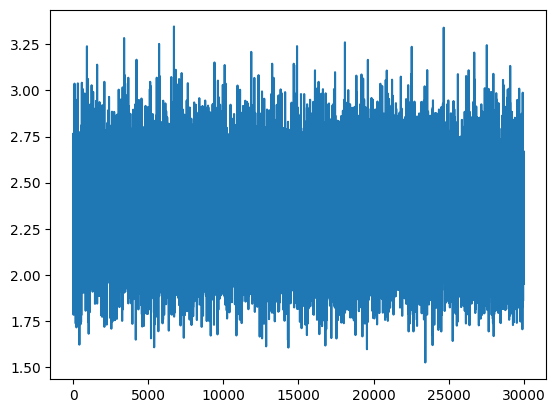

In [56]:
plt.plot(stepi, lossi)

In [57]:
emb = C[Xdev]
wi1 = emb.view(-1, 6) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.3201210498809814

In [61]:
emb = C[Xte]
wi1 = emb.view(-1, 6) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
loss = F.cross_entropy(logits, Yte)
loss.item()

2.322606325149536

In [63]:
emb = C[Xtr]
wi1 = emb.view(-1, 6) @ w1
wi1b = wi1 + b1
wi1ba = wi1b.tanh()
wi2 = wi1ba @ w2
logits = wi2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.3188865184783936

In [40]:
block_size = 3

In [59]:
def prompt(context, max_length=15, samples=1):
  for x in range(samples):
    out = context
    context2 = context[abs(len(context) - block_size):]
    length = 0
    cx = [0] * block_size
    cx = cx[len(context2):] + [stoi[c] for c in context2]
    while True:
      length += 1
      emb = C[cx]
      wi1 = emb.view(-1, 6) @ w1
      wi1b = wi1 + b1
      wi1ba = wi1b.tanh()
      wi2 = wi1ba @ w2
      logits = wi2 + b2
      counts = logits.exp()
      probs = counts / counts.sum(1, keepdim=True)
      char = itos[torch.multinomial(probs, num_samples=1).item()]
      if char == '.' or length==max_length:
        break
      out += char
    print(out)

prompt("emm", samples=10)

emmuoa
emmie
emml
emmaayiaa
emmlei
emmanaa
emmaiei
emme
emmeiaee
emmeeiyt


In [70]:
prompt('z', samples=10)
print('\n')
prompt('w', samples=10)

zacsjjtacbjakar
zksaamfzamsassm
zsflssjamezhmem
zazeajbakmsjdak
zdlnajajkkmavas
zjljeameajeaezj
zsrfedjtaysskzn
zttkcjealsjcvat
zkjjjwlaajahkak
zacashggsmttmmy


wseeeekaelrcfae
wjcmeljrkdsadoc
wzaapaczkacesea
wejjkassdparcsj
wklaajceacdanaf
waebcajamtbakmq
wkjvtwzeqkalrga
wagdsjyekmkklmj
wmcajztvalycaea
waedxzbadrxaaer


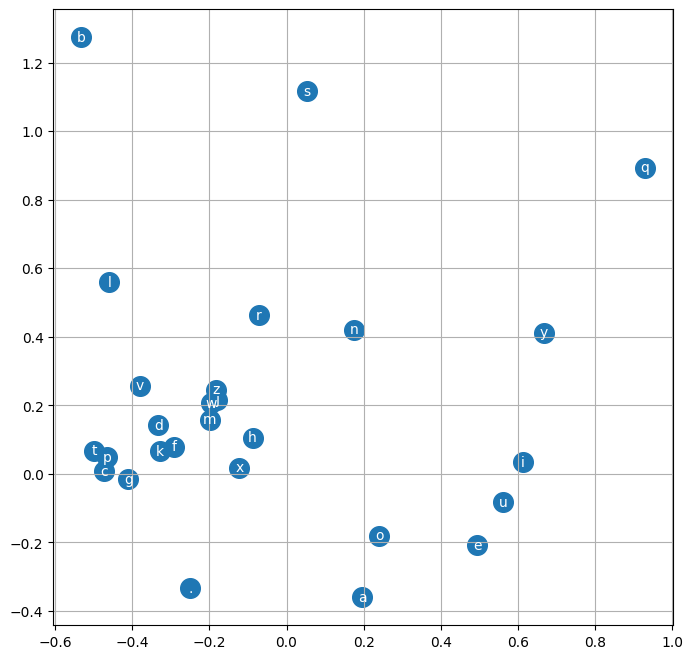

In [66]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

thought it was overfitting for a second there

In [27]:
torch.randint(0, X.shape[0], (32,))

tensor([166341, 175833, 178332, 111890, 202363,  96560,  63197, 223299, 127832,
         44378,   4475,   8426, 212517, 133896, 191393, 195924, 188293, 222570,
        215025, 105102, 101182,  32761, 139984, 196999, 146114, 100328, 204613,
        211893,  38554, 113130, 196943, 153242])

In [ ]:
# train, val, test split
# 80%, 10%, 10%
